# Language Translation using [HuggingFace Transformers](https://huggingface.co/models?pipeline_tag=translation&sort=trending)

## Encoder Decoder Model

Source: <https://www.youtube.com/watch?v=fjJOgb-E41w&t=51s>

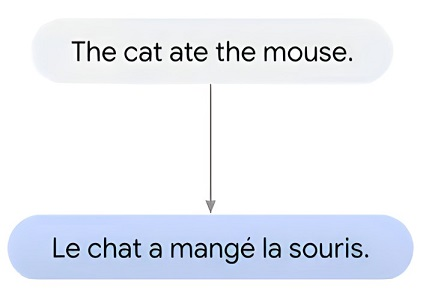

In [2]:
from IPython.display import Image
Image(filename='ED1.jpg')

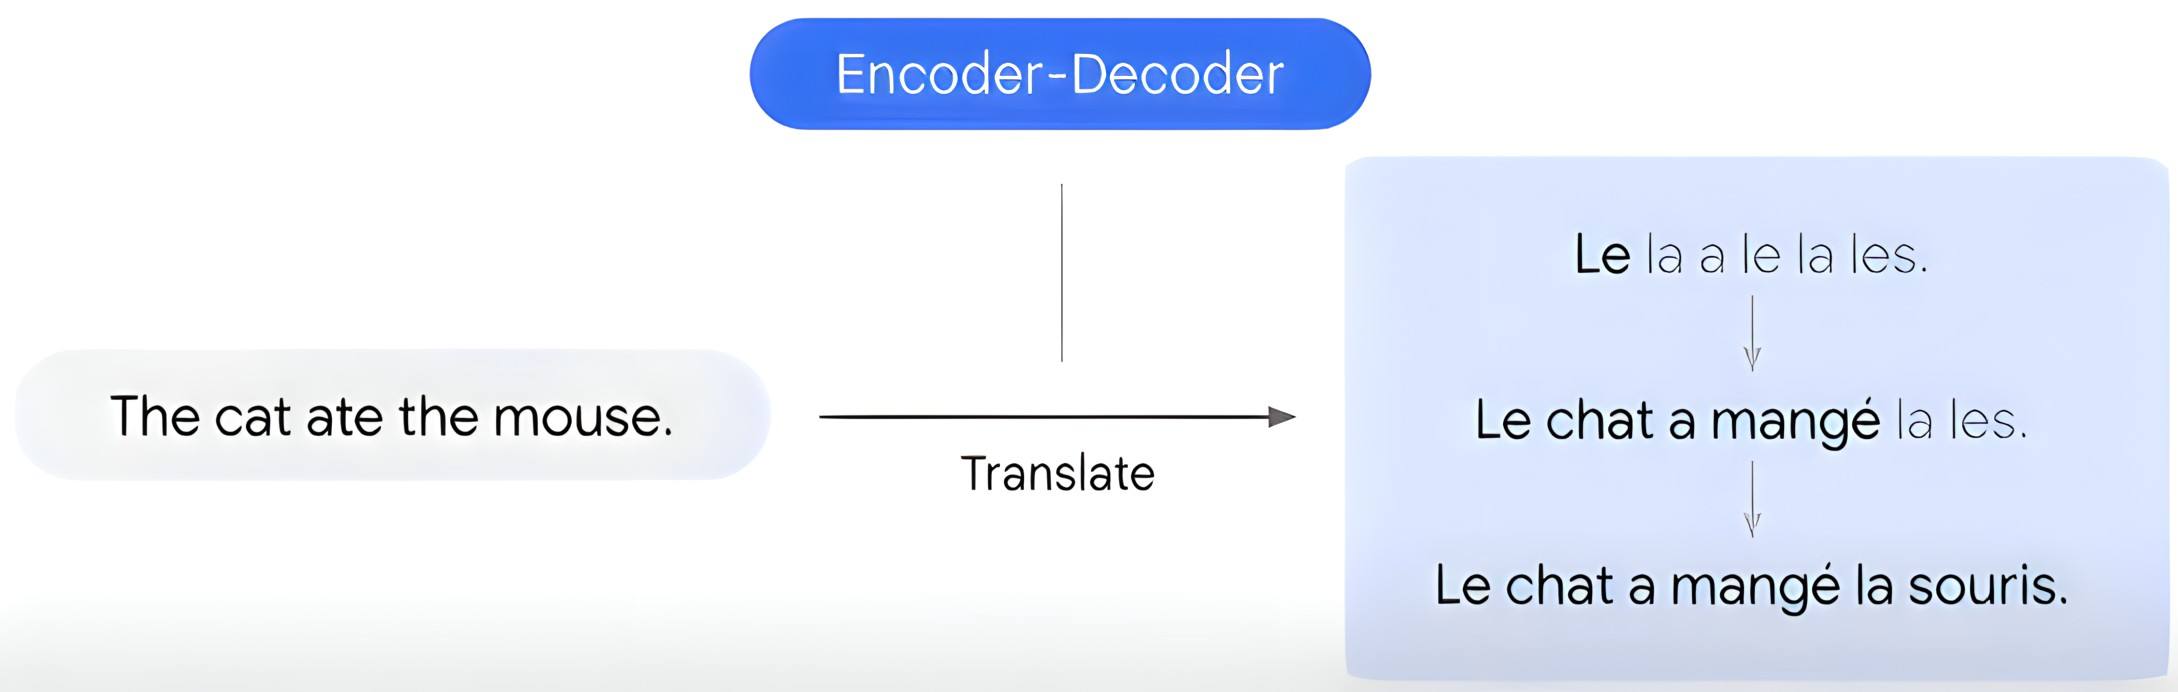

In [3]:
from IPython.display import Image
Image(filename='ED2.jpg')

The encoder decoder model takes one word at a time and translates it. Sometimes, the words in the source language do not align with the words in the target language.

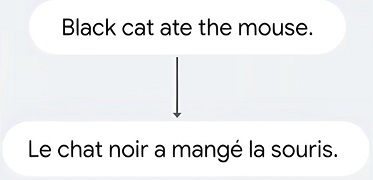

In [5]:
from IPython.display import Image
Image(filename='ED3.jpg')

In this case the model needs to focus more on the word **"cat"** than the word **"black"**

## Self Attention

Self-attention is the secret sauce in transformers. This mechanism allows the model to weigh the importance of different words in a sentence relative to each other. By computing attention scores, the model can focus on relevant parts of the input sequence when generating a representation for a given token. This is crucial for capturing dependencies and contextual relationships within the text.

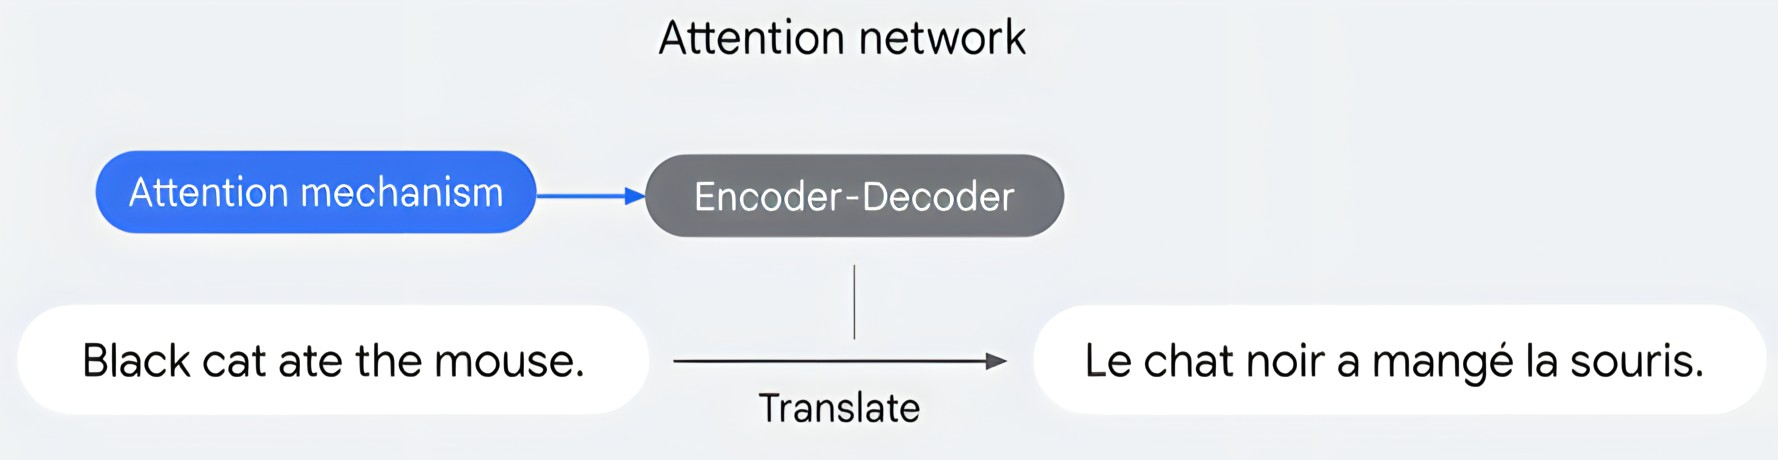

In [6]:
from IPython.display import Image
Image(filename='ED4.jpg')

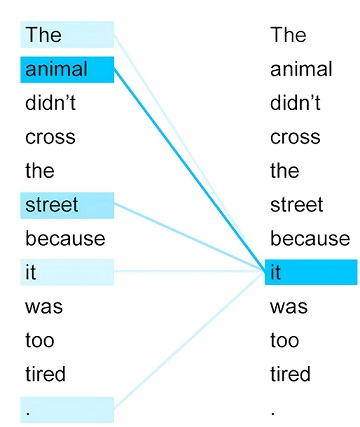

In [13]:
from IPython.display import Image
Image(filename='Self_Attention.jpg')

Source: https://blog.research.google/2017/08/transformer-novel-neural-network.html?m=1


**Unidirectional:**

In this example text,  "The animal didn’t cross the street because it was too tired."  

How is the model able to determine that the `it` corresponds to the animal and not the street in the first case?  

It does this using a mechanism called self-attention (with attention scores) that incorporates the embeddings for all the other words in the sentence. When processing the word `it`,  self-attention will take a weighted average of the embeddings of the other context words.

The darker the shade, the more weight that word is given. And you can see that both animal and street come up as likely for the word `it`.  But animal has the higher weighted average.


**GPT:** Uses self-attention in a unidirectional manner.

**Bidirectional:**

In bidirectional models like BERT (Bidirectional Encoder Representations from Transformers), the model looks at the entire sequence of words (both past and future contexts) simultaneously. This allows the model to understand the context of a word based on both its preceding and succeeding words, leading to more accurate representations.

For example, to represent the word "bank" in "I went to the bank", a unidirectional left-to-right model would only have context from "I went to the" which is ambiguous between a river bank or financial bank. A bi-directional model can also see the future context like, "to deposit money".

This bidirectionality gives the encoder more flexibility to build rich contextualized representations of each word by incorporating information from the entire input sequence, both preceding and following context.

**Facebook BART:**['bart-large-cnn'](https://huggingface.co/facebook/bart-large-cnn). Uses self-attention in a bidirectional manner. 


## Hugging Face

Website: <https://huggingface.co/>

Hugging face is an open source machine learning and data science platform to build, train and deploy machine learning models.
* It hosts open source models, datasets, and also allows to serve models with APIs.
* Developers can create their own code, models and publish on HuggingFace repository.
* You can also host a ML model as an API on HuggingFace Hub.

## Language Transalation Model

NLLB: No Language Left Behind: ['nllb-200-distilled-600M'](https://huggingface.co/facebook/nllb-200-distilled-600M).



- Let's install the following librarires
```
    !pip install transformers
    !pip install torch
```

In [1]:
# Code to ignore warnings
from transformers.utils import logging
logging.set_verbosity_error()

## Let's build the translation pipeline using **Transformers** Library

Hugging Face provides different approaches to using a model in the Transformers library.

1. **Using a pipeline:** This approach is simpler and more high-level. It abstracts away many of the details and provides a quick way to use the model for its intended task.
   * Handles preprocessing and postprocessing automatically
   * Easier to use, especially for beginners
   * Good for quick prototyping or simple use cases
   * Less flexible and customizable
     </p>
2. **Loading the model directly:** This approach gives you more control over the model and its usage. It's more low-level and requires more code, but offers greater flexibility.
   * More control over the model's behavior
   * Allows for custom preprocessing and postprocessing
   * Better for advanced use cases or when you need to modify the model's behavior
   * Requires more code and understanding of the model's architecture

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

 The process:

1. Model Download: When you create a pipeline, the Transformers library automatically downloads the model weights and configuration files to your local machine. By default, these are stored in a cache directory (usually ~/.cache/huggingface/transformers/).
   
2. Local Execution: Once downloaded, the model runs entirely on your local machine. This means you don't need an internet connection after the initial download, and you're not making API calls to Hugging Face servers for inference.

3. First-time vs. Subsequent Use: The first time you use a specific model with a pipeline, it will download the necessary files. On subsequent runs, it will use the locally cached version unless you explicitly request a new download.

4. Resource Usage: Since the model runs locally, it uses your system's resources (CPU, GPU, RAM) for computations.

In [3]:
translator = pipeline(task="translation", model="facebook/nllb-200-distilled-600M")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [16]:
# sample text
text = """ Life is like a box of chocolates, You never know what you're gonna get."""

In [9]:
print(text)

 Life is like a box of chocolates, You never know what you're gonna get.


In [17]:
# create a translator object
translation = translator(text, src_lang="eng_Latn", tgt_lang="fra_Latn")
print(translation)

[{'translation_text': 'Das Leben ist wie eine Schachtel Schokolade, Sie wissen nie, was Sie bekommen werden.'}]


**Note:** the pipeline function is designed to work with single text inputs, not multi-line or multi-sentence inputs.

Python module regular expression - https://docs.python.org/3/library/re.html

In [10]:
# Import regular expression module
import re

text = """
Life is like a box of chocolates.
You never know what you're gonna get."""

translator = pipeline(task="translation", model="facebook/nllb-200-distilled-600M")

# re.split, splits the input string at the positions that match the pattern, effectively separating the string into individual sentences.
sentences = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', text)

translations = []
for sentence in sentences:
    translation = translator(sentence, src_lang="en", tgt_lang="fr")
    translations.append(translation[0]['translation_text'])

print('\n'.join(translations))

fr Life is like a box of chocolates. you never know what you're gonna get.


Code for other languages can be found here: [Languages in FLORES-200](https://github.com/facebookresearch/flores/blob/main/flores200/README.md#languages-in-flores-200)

For example:
- Afrikaans: afr_Latn
- Chinese: zho_Hans
- Egyptian Arabic: arz_Arab
- French: fra_Latn
- Hindi: hin_Deva
- Indonesian: ind_Latn
- Italian: ita_Latn
- Russian: rus_Cyrl
- Spanish: spa_Latn

####  Go ahead, try your favourite language.